# trell social media usage data

## The goal is to predict the age group

#### In this world of big data, Trell wants you to use the data to predict the age group of their users based on their activity on social media activities. This will help them to divide their huge userbase and cater differently to each of them.

https://trell.co/watch/


The resource of the dataset:

https://www.kaggle.com/adityak80/trell-social-media-usage-data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('../input/trell-social-media-usage-data/train_age_dataset.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Observe the dataset

In [3]:
df.shape

(488877, 27)

In [4]:
df.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0' , axis = 1)

### Observe if there is any object type to convert it
#### We apply this approach so we can get valuable information from the model later

In [6]:
df.dtypes

userId                               int64
tier                                 int64
gender                               int64
following_rate                     float64
followers_avg_age                  float64
following_avg_age                  float64
max_repetitive_punc                  int64
num_of_hashtags_per_action         float64
emoji_count_per_action             float64
punctuations_per_action            float64
number_of_words_per_action         float64
avgCompletion                      float64
avgTimeSpent                       float64
avgDuration                        float64
avgComments                          int64
creations                          float64
content_views                      float64
num_of_comments                    float64
weekends_trails_watched_per_day    float64
weekdays_trails_watched_per_day    float64
slot1_trails_watched_per_day       float64
slot2_trails_watched_per_day       float64
slot3_trails_watched_per_day       float64
slot4_trail

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   userId                           488877 non-null  int64  
 1   tier                             488877 non-null  int64  
 2   gender                           488877 non-null  int64  
 3   following_rate                   488877 non-null  float64
 4   followers_avg_age                488877 non-null  float64
 5   following_avg_age                488877 non-null  float64
 6   max_repetitive_punc              488877 non-null  int64  
 7   num_of_hashtags_per_action       488877 non-null  float64
 8   emoji_count_per_action           488877 non-null  float64
 9   punctuations_per_action          488877 non-null  float64
 10  number_of_words_per_action       488877 non-null  float64
 11  avgCompletion                    488877 non-null  float64
 12  av

In [8]:
df.isnull().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

In [9]:
df.describe(include = 'all')

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [10]:
import scipy.stats 

corrs = []
for col in df:
    corr = scipy.stats.spearmanr(df['age_group'], df[col])
    corrs.append({
        'feature': col,
        'correlation': corr[0],
        'correlation_p_value': corr[1]
    })
    
pd.DataFrame(corrs).sort_values('correlation')

,feature,correlation,correlation_p_value
0,userId,-0.201443,0.000000e+00
1,tier,-0.078105,0.000000e+00
2,gender,-0.043622,1.655575e-204
7,num_of_hashtags_per_action,0.026919,4.714582e-79
8,emoji_count_per_action,0.047038,1.738757e-237
11,avgCompletion,0.072369,0.000000e+00
13,avgDuration,0.137311,0.000000e+00
9,punctuations_per_action,0.157710,0.000000e+00
21,slot2_trails_watched_per_day,0.186993,0.000000e+00
20,slot1_trails_watched_per_day,0.190945,0.000000e+00


## This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups, 
### 1: <18y
### 2: 18-24y
### 3: 24-30y
### 4: >30y

In [11]:
df['age_group'].value_counts()

1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

#### To check if there is any input problems since this is the most important feature for us

In [12]:
df['age_group'].unique()

array([1, 2, 3, 4])

In [13]:
df['tier'].value_counts()

2    397890
1     51511
3     39476
Name: tier, dtype: int64

In [14]:
for x in df.columns:
    print("Name of the column:", x)
    print(df[x].nunique())

Name of the column: userId
488877
Name of the column: tier
3
Name of the column: gender
2
Name of the column: following_rate
15453
Name of the column: followers_avg_age
3495
Name of the column: following_avg_age
3949
Name of the column: max_repetitive_punc
95
Name of the column: num_of_hashtags_per_action
420
Name of the column: emoji_count_per_action
742
Name of the column: punctuations_per_action
3129
Name of the column: number_of_words_per_action
16664
Name of the column: avgCompletion
458839
Name of the column: avgTimeSpent
98838
Name of the column: avgDuration
415696
Name of the column: avgComments
186
Name of the column: creations
9972
Name of the column: content_views
32292
Name of the column: num_of_comments
3881
Name of the column: weekends_trails_watched_per_day
20340
Name of the column: weekdays_trails_watched_per_day
31432
Name of the column: slot1_trails_watched_per_day
11765
Name of the column: slot2_trails_watched_per_day
20220
Name of the column: slot3_trails_watched_pe

# Detect outliers

In [15]:
df['tier'].describe()

count    488877.000000
mean          1.975382
std           0.430707
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: tier, dtype: float64

In [16]:
df['age_group'].describe()

count    488877.000000
mean          1.741643
std           1.088559
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: age_group, dtype: float64

Column name: userId


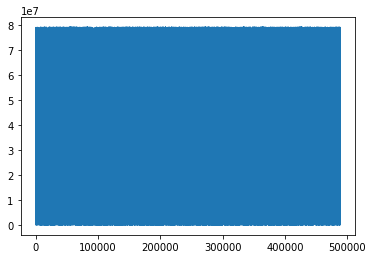

Column name: tier


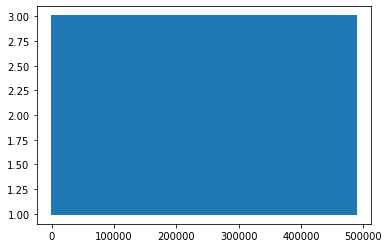

Column name: gender


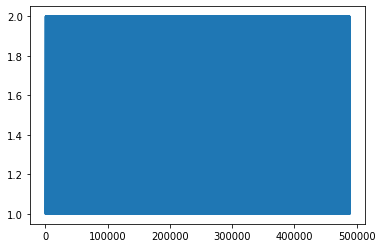

Column name: following_rate


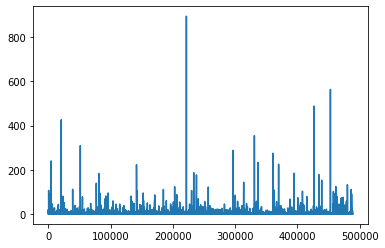

Column name: followers_avg_age


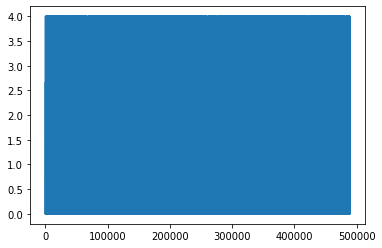

Column name: following_avg_age


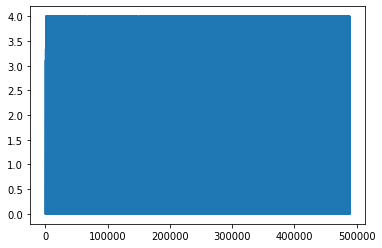

Column name: max_repetitive_punc


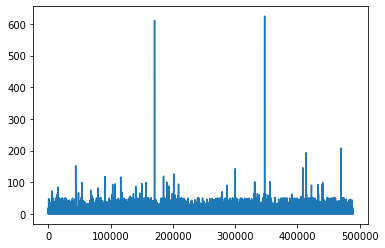

Column name: num_of_hashtags_per_action


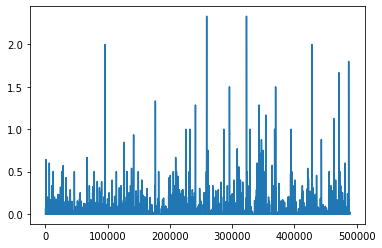

Column name: emoji_count_per_action


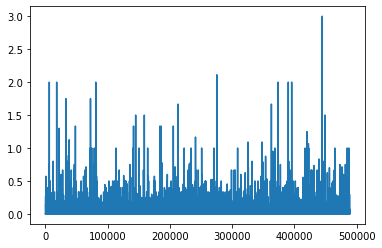

Column name: punctuations_per_action


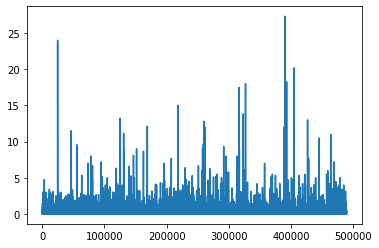

Column name: number_of_words_per_action


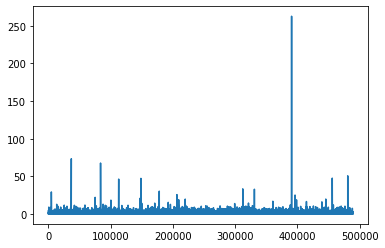

Column name: avgCompletion


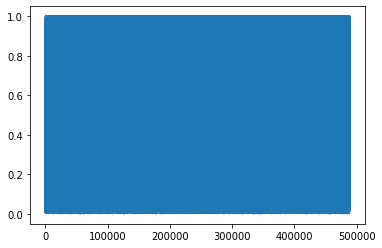

Column name: avgTimeSpent


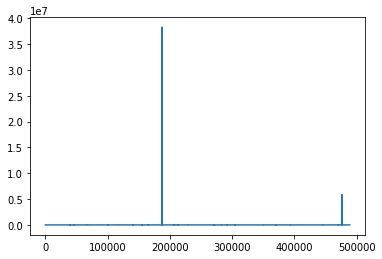

Column name: avgDuration


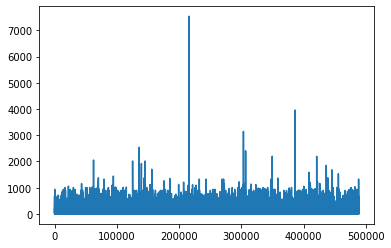

Column name: avgComments


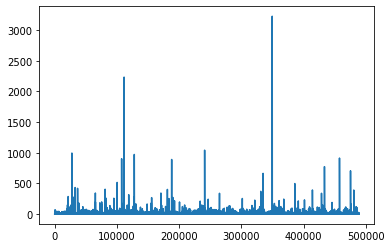

Column name: creations


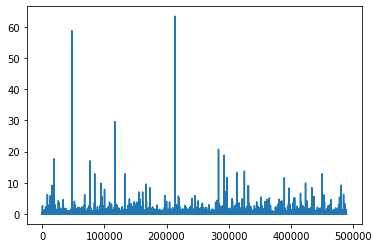

Column name: content_views


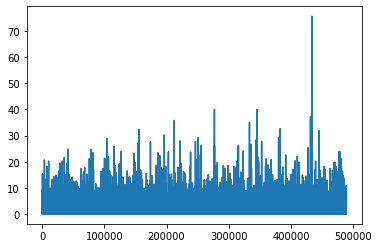

Column name: num_of_comments


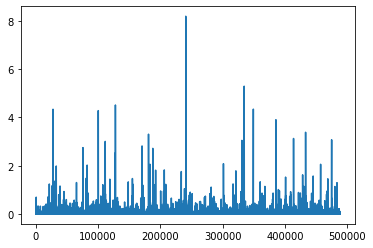

Column name: weekends_trails_watched_per_day


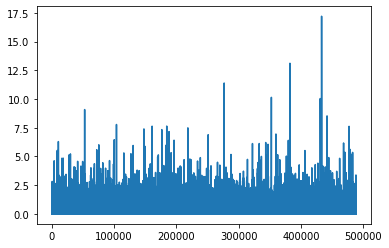

Column name: weekdays_trails_watched_per_day


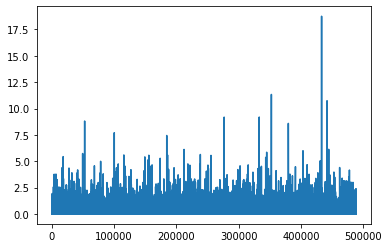

Column name: slot1_trails_watched_per_day


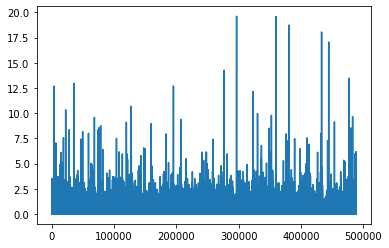

Column name: slot2_trails_watched_per_day


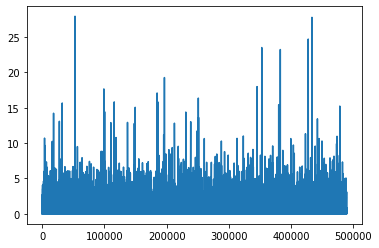

Column name: slot3_trails_watched_per_day


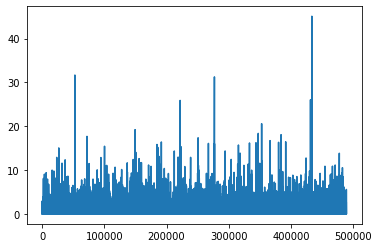

Column name: slot4_trails_watched_per_day


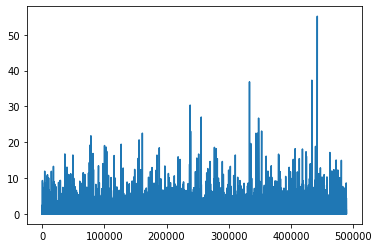

Column name: avgt2


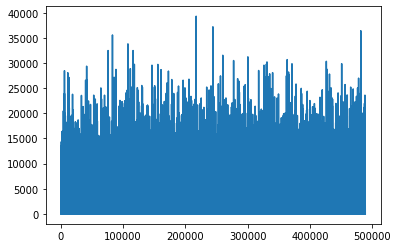

Column name: age_group


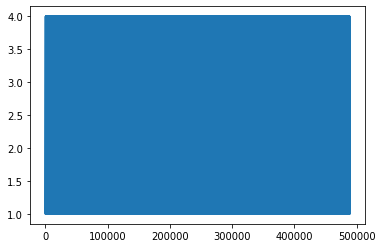

In [17]:
for x in df.columns:
    print('Column name:' , x)
    plt.plot(df[x])
    plt.show()

# Remove Outliers

In [18]:
import numpy as np
from numpy import percentile

In [19]:
q25, q75 = percentile(df.loc[:,'age_group'], 25), percentile(df.loc[:,'num_of_hashtags_per_action'], 75)
iqr = q75 - q25
print(q25,q75)
print(iqr)

1.0 0.0
-1.0


In [20]:
df['num_of_hashtags_per_action'].describe()

count    488877.000000
mean          0.000277
std           0.012221
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.333333
Name: num_of_hashtags_per_action, dtype: float64

In [21]:
outliers = [x for x in df.loc[:,'num_of_hashtags_per_action'] if x > 0.4]
outliers

[0.642857143,
 0.6,
 0.5,
 0.5,
 0.571428571,
 0.428571429,
 0.5,
 0.666666667,
 0.5,
 0.5,
 2.0,
 0.5,
 0.846153846,
 0.470588235,
 0.5,
 0.538461538,
 0.933333333,
 0.5,
 1.333333333,
 0.5,
 0.428571429,
 0.454545455,
 0.5,
 0.666666667,
 0.5,
 0.444444444,
 1.0,
 0.5,
 0.5,
 1.0,
 1.285714286,
 0.5,
 2.333333333,
 0.666666667,
 0.75,
 1.0,
 1.5,
 0.769230769,
 0.555555556,
 2.333333333,
 0.5,
 1.0,
 0.6,
 1.285714286,
 0.714285714,
 0.875,
 0.75,
 0.5,
 1.166666667,
 0.571428571,
 1.0,
 1.5,
 0.473684211,
 1.0,
 0.5,
 0.538461538,
 0.416666667,
 2.0,
 0.454545455,
 0.878787879,
 0.5,
 1.125,
 1.666666667,
 0.5,
 0.6,
 1.8]

In [22]:
df[df['num_of_hashtags_per_action'] > 0]

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
305,32612910,2,2,0.007812,0.000000,0.000000,3,0.066667,0.266667,0.133333,...,0.101562,0.000000,0.089844,0.001563,0.000000,0.000000,0.007812,0.179688,186.500000,1
669,220196,2,1,0.050367,2.333333,2.500000,3,0.642857,0.000000,0.928571,...,0.007345,0.002099,0.000525,0.003568,0.015740,0.000000,0.001049,0.002099,2768.463415,2
2857,1956238,1,2,0.018416,2.214286,3.333333,7,0.029412,0.019608,0.186275,...,0.099448,0.000000,0.013812,0.041252,0.034991,0.011050,0.095764,0.092081,191.737533,3
2911,50415054,2,2,0.000000,0.000000,0.000000,4,0.038462,0.000000,0.173077,...,0.411765,0.000000,0.033613,0.073950,0.067227,0.000000,0.369748,0.000000,157.428571,2
3153,38896282,2,1,0.000000,0.000000,0.000000,0,0.033333,0.000000,0.066667,...,0.448000,0.000000,0.212000,0.036800,0.040000,0.016000,0.256000,0.296000,174.250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487082,58583104,2,1,0.198020,2.500000,2.388889,2,1.800000,0.000000,1.800000,...,0.019802,0.000000,0.000000,0.003960,0.000000,0.000000,0.000000,0.019802,183.933333,2
487292,38586461,1,1,0.000000,0.000000,0.000000,2,0.176471,0.000000,0.529412,...,0.072000,0.000000,0.004000,0.022400,0.008000,0.000000,0.064000,0.048000,182.250000,2
488270,183737,1,1,0.016360,2.200000,2.200000,4,0.004950,0.000000,0.014851,...,0.186094,0.005112,0.041922,0.065235,0.127812,0.024540,0.162577,0.095092,962.513699,2
488443,56089298,2,1,0.009259,0.000000,0.000000,2,0.020408,0.000000,0.142857,...,0.333333,0.000000,0.046296,0.096296,0.000000,0.083333,0.046296,0.444444,218.153846,3


In [23]:
print(len(outliers))

66


In [24]:
outliers = df.query('@outliers in num_of_hashtags_per_action')
outliers

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
669,220196,2,1,0.050367,2.333333,2.500000,3,0.642857,0.000000,0.928571,...,0.007345,0.002099,0.000525,0.003568,0.01574,0.000000,0.001049,0.002099,2768.463415,2
6219,37366240,2,1,0.000000,0.000000,0.000000,2,0.600000,0.200000,2.200000,...,0.056000,0.000000,0.044000,0.000000,0.00000,0.072000,0.016000,0.000000,0.000000,1
12422,48683031,1,1,0.108333,2.100000,2.500000,3,0.500000,0.083333,1.583333,...,0.075000,0.000000,0.004167,0.016667,0.00000,0.066667,0.016667,0.008333,188.466667,4
26661,35705932,3,1,0.000000,0.000000,0.000000,0,0.500000,0.000000,1.000000,...,0.031746,0.000000,0.023810,0.017460,0.00000,0.039683,0.039683,0.055556,179.500000,3
28559,37874946,2,1,0.000000,0.000000,0.000000,0,0.571429,0.000000,0.571429,...,0.088000,0.008000,0.056000,0.001600,0.00000,0.000000,0.072000,0.048000,84.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463289,445970,1,1,0.020782,0.000000,0.000000,0,1.125000,0.000000,2.000000,...,0.004890,0.000000,0.000000,0.000978,0.00000,0.000000,0.000000,0.004890,16980.333330,3
471324,37624575,2,2,0.000000,0.000000,0.000000,0,1.666667,0.000000,1.666667,...,0.016000,0.000000,0.012000,0.000000,0.00000,0.016000,0.000000,0.008000,0.000000,1
472965,33119829,2,2,0.000000,0.000000,0.000000,0,0.500000,0.000000,1.000000,...,0.007874,0.000000,0.000000,0.001575,0.00000,0.007874,0.000000,0.000000,0.000000,1
481292,35293405,1,2,0.023810,2.000000,3.000000,5,0.600000,0.100000,3.400000,...,0.055556,0.000000,0.000000,0.022222,0.00000,0.000000,0.095238,0.015873,136.600000,2


In [25]:
outliers.index

Int64Index([   669,   6219,  12422,  26661,  28559,  33185,  46433,  66945,
             78436,  95455,  95857, 113932, 126613, 130550, 131033, 138332,
            141682, 149163, 176592, 181847, 198807, 200577, 205436, 209230,
            210512, 213022, 225406, 225784, 230990, 231929, 241003, 258616,
            259014, 260577, 261294, 286634, 295596, 308141, 310703, 322958,
            323373, 328697, 340031, 343179, 346085, 346965, 349632, 351170,
            353876, 364094, 368187, 369756, 393818, 394701, 395719, 421302,
            422484, 428001, 435517, 443209, 455769, 463289, 471324, 472965,
            481292, 487082],
           dtype='int64')

In [26]:
df_filtered = df.drop(outliers.index , axis = 0)
df_filtered.shape

(488811, 26)

In [27]:
df.shape[0] - df_filtered.shape[0]

66

Text(0.5, 1.0, '#hashtags_per_action Values AFTER removing outliers \n')

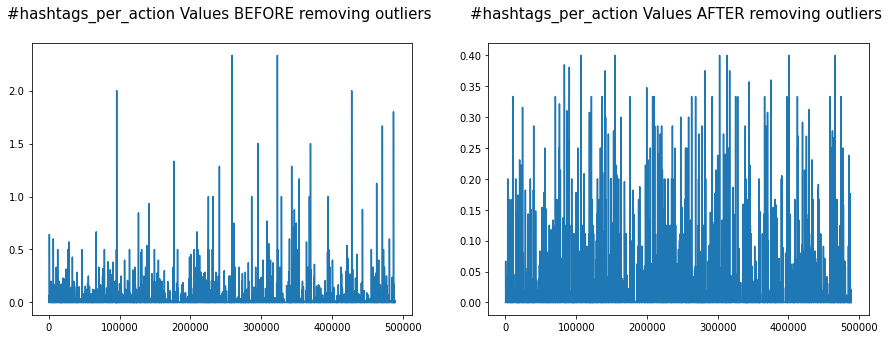

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(df['num_of_hashtags_per_action'].values)
plt.title('#hashtags_per_action Values BEFORE removing outliers \n',fontsize=15)

plt.subplot(122)
plt.plot(df_filtered['num_of_hashtags_per_action'].values)
plt.title('#hashtags_per_action Values AFTER removing outliers \n',fontsize=15)

# Remove outliers from each age group separately

In [29]:
df_filtered_age_group1 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 1])
df_filtered_age_group1.shape

(308287, 26)

In [30]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action' , 'avgTimeSpent']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group1[x].mean() + 2 * df_filtered_age_group1[x].std()
        lower_limit = df_filtered_age_group1[x].mean() - 2 * df_filtered_age_group1[x].std()

        outliers = df_filtered_age_group1[(df_filtered_age_group1[x]>upper_limit) | (df_filtered_age_group1[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group1.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group1.shape[0])

column name: avgTimeSpent
7
308280
column name: content_views
8574
299706
column name: creations
2931
296775
column name: avgt2
928
295847
column name: number_of_words_per_action
7142
288705
column name: avgTimeSpent
1226
287479


In [31]:
df_filtered_age_group2 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 2])
df_filtered_age_group2.shape

(59335, 26)

In [32]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action' , 'avgTimeSpent']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group2[x].mean() + 2 * df_filtered_age_group2[x].std()
        lower_limit = df_filtered_age_group2[x].mean() - 2 * df_filtered_age_group2[x].std()

        outliers = df_filtered_age_group2[(df_filtered_age_group2[x]>upper_limit) | (df_filtered_age_group2[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group2.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group2.shape[0])

column name: avgTimeSpent
99
59236
column name: content_views
1785
57451
column name: creations
599
56852
column name: avgt2
788
56064
column name: number_of_words_per_action
2256
53808
column name: avgTimeSpent
1163
52645


In [33]:
df_filtered_age_group3 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 3])
df_filtered_age_group3.shape

(60388, 26)

In [34]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group3[x].mean() + 2 * df_filtered_age_group3[x].std()
        lower_limit = df_filtered_age_group3[x].mean() - 2 * df_filtered_age_group3[x].std()

        outliers = df_filtered_age_group3[(df_filtered_age_group3[x]>upper_limit) | (df_filtered_age_group3[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group3.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group3.shape[0])

column name: avgTimeSpent
1
60387
column name: content_views
2062
58325
column name: creations
942
57383
column name: avgt2
1003
56380
column name: number_of_words_per_action
1750
54630


In [35]:
df_filtered_age_group4 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 4])
df_filtered_age_group4.shape

(60801, 26)

In [36]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group4[x].mean() + 2 * df_filtered_age_group4[x].std()
        lower_limit = df_filtered_age_group4[x].mean() - 2 * df_filtered_age_group4[x].std()

        outliers = df_filtered_age_group4[(df_filtered_age_group4[x]>upper_limit) | (df_filtered_age_group4[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group4.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group4.shape[0])

column name: avgTimeSpent
328
60473
column name: content_views
2391
58082
column name: creations
698
57384
column name: avgt2
832
56552
column name: number_of_words_per_action
394
56158


# After Cleaning Our DF  we get the following

In [37]:
df_filtered.shape

(488811, 26)

In [38]:
df = pd.concat([df_filtered_age_group1 , df_filtered_age_group2 , df_filtered_age_group3 , df_filtered_age_group4], axis=0)

In [39]:
df.shape

(450912, 26)

## Better way to see raltions by plotting the data
### We would like to see which tier is the most popular along with the age

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

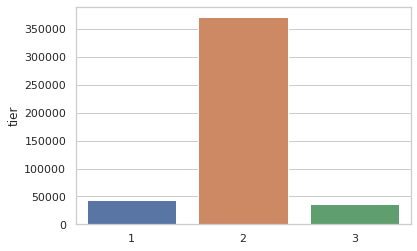

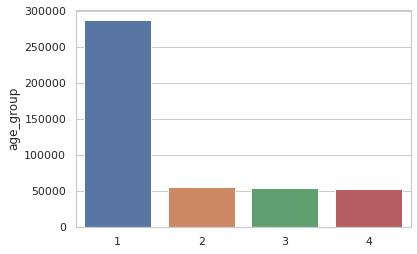

In [41]:
for column in df[['tier' , 'age_group']]:
    plt.figure()
    sns.barplot(x = df[column].unique() , y = df[column].value_counts() , data = df)
    plt.show()
    

### Distrubution of the age represnted as a %

In [42]:
df['age_group'].value_counts()

1    287479
4     56158
3     54630
2     52645
Name: age_group, dtype: int64

In [43]:
(df['age_group'].value_counts() / df.shape[0] * 100)


1    63.755012
4    12.454315
3    12.115446
2    11.675227
Name: age_group, dtype: float64

## Observe the relations between the features

### Our goal is to determine the most corellated feature with the age group 

## 1 is identical -1 There are no relation

<AxesSubplot:>

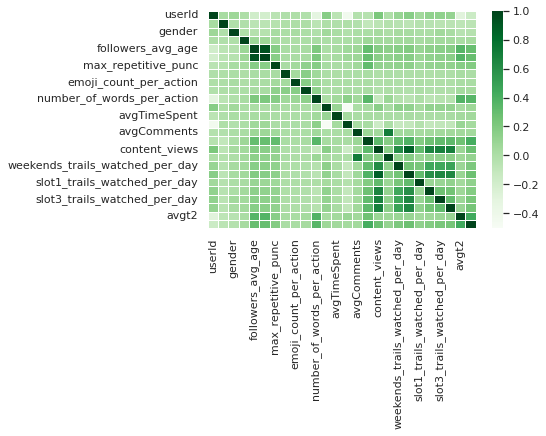

In [44]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr() , cmap="Greens" , linewidths=0.5)

In [45]:
import scipy.stats 

corrs = []
for col in df:
    corr = scipy.stats.spearmanr(df['age_group'], df[col])
    corrs.append({
        'feature': col,
        'correlation': corr[0],
        'correlation_p_value': corr[1]
    })
    
pd.DataFrame(corrs).sort_values('correlation')

,feature,correlation,correlation_p_value
0,userId,-0.200237,0.000000e+00
1,tier,-0.068911,0.000000e+00
2,gender,-0.043706,1.655493e-189
7,num_of_hashtags_per_action,0.029814,3.358873e-89
8,emoji_count_per_action,0.056485,0.000000e+00
11,avgCompletion,0.084070,0.000000e+00
13,avgDuration,0.131900,0.000000e+00
9,punctuations_per_action,0.168081,0.000000e+00
20,slot1_trails_watched_per_day,0.184194,0.000000e+00
21,slot2_trails_watched_per_day,0.195375,0.000000e+00


## These are the main important for our case

In [46]:
df.groupby('age_group')[['creations', 'avgt2', 'number_of_words_per_action']].agg('mean')

,creations,avgt2,number_of_words_per_action
age_group,,,
1,0.002359,32.943244,0.035814
2,0.018968,200.488695,0.335442
3,0.021863,206.580356,0.243284
4,0.028260,196.934565,0.225336


In [47]:
corr_columns = ['creations', 'avgt2', 'number_of_words_per_action']

In [48]:
X = df[corr_columns]
y = df['age_group']

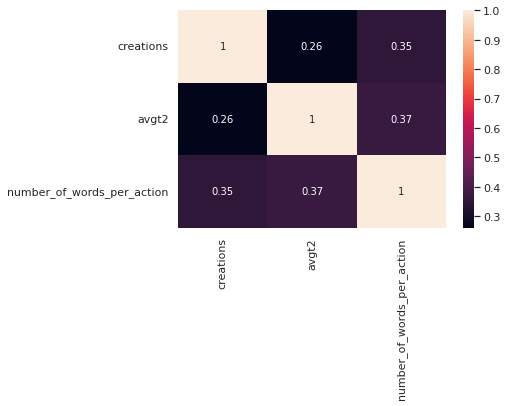

In [49]:
sns.heatmap(X.corr(),annot=True);

In [50]:
rfm_c_log = np.log(X['creations']+0.1)
rfm_n_log = np.log(X['number_of_words_per_action']+0.1)

X = pd.DataFrame({'creations' : rfm_c_log, 'avgt2' : X['avgt2'], 'number_of_words_per_action' : rfm_n_log})

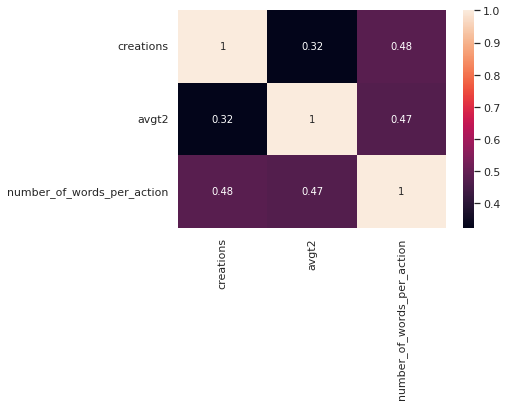

In [51]:
sns.heatmap(X.corr(),annot=True);

# Apply the ML Model

### #########


# Train Test

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=60)


# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
model.score(X_test, y_test)

0.7181508710067308

In [55]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 1, ..., 3, 1, 1])

In [56]:
y_test.unique()

array([1, 4, 3, 2])

Text(30.5, 0.5, 'Truth')

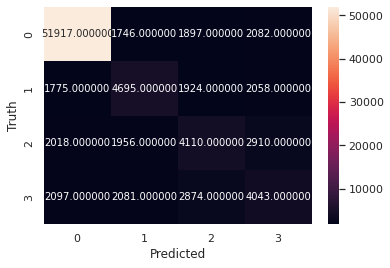

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred )


import seaborn as sn
sn.heatmap(cm , annot = True , fmt = 'f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90     57642
           2       0.45      0.45      0.45     10452
           3       0.38      0.37      0.38     10994
           4       0.36      0.36      0.36     11095

    accuracy                           0.72     90183
   macro avg       0.52      0.52      0.52     90183
weighted avg       0.72      0.72      0.72     90183




## K Fold Cross Validation

In [59]:
from sklearn.model_selection import cross_val_predict , cross_val_score
pred = cross_val_predict(model , X_test , y_test)


In [60]:
pred

array([2, 1, 1, ..., 4, 1, 1])

In [61]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model , X_train , y_train , scoring = 'accuracy' , cv = 3)
accuracy

array([0.71543458, 0.71587535, 0.71584209])

In [62]:
accuracy.mean()

0.7157173390550801

Text(30.5, 0.5, 'Truth')

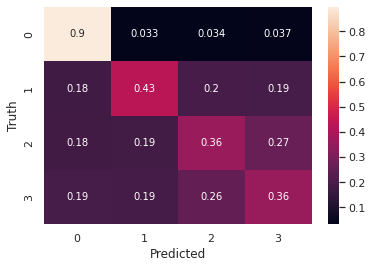

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , pred , normalize= 'true')

import seaborn as sn
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90     57642
           2       0.43      0.43      0.43     10452
           3       0.37      0.36      0.37     10994
           4       0.36      0.36      0.36     11095

    accuracy                           0.71     90183
   macro avg       0.51      0.51      0.51     90183
weighted avg       0.71      0.71      0.71     90183



# Train All data

In [65]:
model.fit(X, y)

result = model.predict(X)

In [66]:
import pickle

### To Save the file

with open('./Model.pickle' , 'wb') as f: # Write
    pickle.dump(model , f)

In [67]:
### To Open the file    
with open('./Model.pickle' , 'rb') as f: # Read
    trell_model = pickle.load(f)

## Test the model on the test dataset

In [68]:
test_df = pd.read_csv('../input/trell-social-media-usage-data/test_age_dataset.csv')

In [69]:
test_df = test_df.drop('Unnamed: 0' , axis = 1)

In [70]:
test_df = test_df[corr_columns] 

In [71]:
predict = trell_model.predict(test_df)

In [72]:
predict_df = pd.DataFrame(predict, columns = ['Prediction'])


In [73]:
predict_df.value_counts()

Prediction
4             54320
dtype: int64

# Compare the accuracy with the sample csv

In [74]:
sample_y = pd.read_csv('../input/trell-social-media-usage-data/sample_submission.csv')

In [75]:
sample_y.value_counts()

prediction
1             54320
dtype: int64

# sample_submission is misleading all results are = 1 which is 100% can not be a measurement if the model acts good 

# ###############


### Understanding the requirments are important but what is more important is how to make the best out of the data


#### Maniplulating data, understanding the relations among the features, remove redundants and outliers and apply preprocessing methods are all very important to improve the final model accuracy

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/0nyh5Q6/Screen-Shot-2021-11-23-at-10-25-27.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/2MNvMtQ/Screen-Shot-2021-11-23-at-10-36-26.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/V96wVFZ/Screen-Shot-2021-11-23-at-10-27-21.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>